## Chapter 4. Improving Embeddings with Biased Random Walks in Node2Vec

Node2Vec은 DeepWalk의 수행 과정에서의 Random Walk와 Word2Vec을 동일하게 활용하지만 균일한 분포를 가진 노드 분포를 갖는다.

### Defining Neiborhood

- 이웃 노드를 정의하는 것은 직관적으로 시작 노드에 가까운 것으로 생각하지만 그래프 데이터 구조에서의 "Close(가까움)"는 문맥적으로 다를 수 있다.
- 이웃 노드를 탐색하기 위해 두 가지 Sampling 전략을 활용 가능하다.
- 연결되어 있는 주변 노드를 탐색하거나 반대로 이전에 인접하지 않은 노드를 선택하는 방법이 있다.

### DFS와 BFS의 관점에서 본 이웃 노드의 해석
- 이웃 노드를 정의할 때 BFS는 노드 주변의 로컬 네트워크에 초점을 둔다.
- DFS는 보다 거시적인 관점에서 네트워크 구조의 유사성을 확인할 수 있다.
==> BFS는 인접한 노드를 탐색하기 때문에 구조적 동등성에 부합하지만 DFS는 멀리 떨어진 노드를 샘플링할 수 있어 동질성이 떨어지는 노드를 강조한다.

결과적으로, 그래프 구조에서 동질성을 확인하기 위해 인접 노드를 확인하는 작업과 떨어지는 노드 모두 고려할 필요성이 있다. 때문에, 구조적 동등성과 동질성 모두를 결합한 방식을 활용해야 한다.

## Node2Vec

Node2Vec의 두가지 성질에 의해서 이웃 노드를 정의한다.
- 이전 노드와 멀리 있는 노드(DFS)
- 이전 노드와 가까운 노드(BFS)

##### Biased Random Wlak :그래프에서 특정 유형의 경로를 더 자주 탐색하도록 편향을 주는 방식

Biased Random Walk 원리

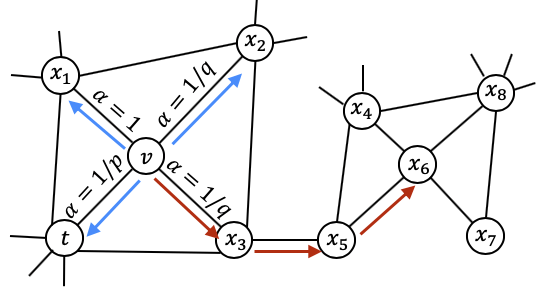

- p값: 이전 노드로 돌아가는 확률이다. p값은 현재 노드의 이전 노드로 돌아가는 것을 선호하는 정도를 나타낸다 즉, p값이 높을수록 이전 노드로 돌아가는 확률이 낮아진다. p값이 클수록 특정 새로운 노드를 탐색하는 경향이 크다. 이는 구조적 동등성을 고려하여 노드 간의 구조적 유사성을 강조하는 역할을 한다.


- q값: q 값이 높을수록 이전 노드에 가까운 노드에 집중하며 BFS와 유사한 형태를 나타낸다. 이는 이전 노드와 가까운 이웃 노드에 더 많은 가중치를 두어 탐색하는 특성을 나타낸다. q값이 클수록 동질성을 고려하여 비슷한 특성을 가진 노드를 방문하는 경향이 있다.

※ DeepWalk의 경우 p와 q 모두 1인 Node2Vec의 사례이다.

In [9]:
import networkx as nx
import random
random.seed(0)
import numpy as np
np.random.seed(0)

G = nx.erdos_renyi_graph(10, 0.3, seed=1, directed=False)

In [10]:
def next_node(previous, current, p, q):
    neighbors = list(G.neibors(current))
    alphas = []

    for neighbor in neighbors:
        if neighbor == previous:
            alpha = 1/p
        elif G.has_enge(neighbor, previous):
            alpha = 1
        else:
            alpha = 1/q
        alphas.append(alpha)
        
        probs = [alpha / sum(alphas for alpha in alphas)]

        next = np.random.choice(neighbors, size = 1, p = probs)[0]

        return next